# Лабораторная работа 3

## Задание 1

Считайте данные из файла 'winemag-data-130k-v2.csv'. 
а) Постройте точечный график (Scatter plot), по оси х отложите points, а по y - price.
б) Постройте график Barplot количества вин по странам.

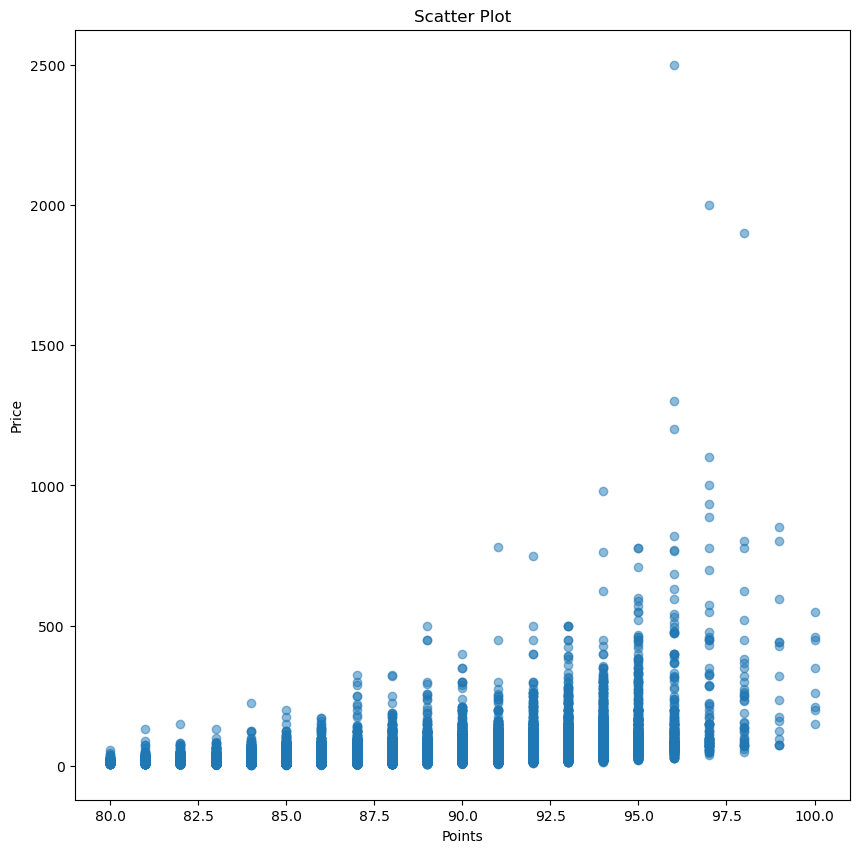

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../Mavlyukaev_AI/data/winemag-data-130k-v2.csv")

points = data['points'].to_numpy()
price = data['price'].to_numpy()

#а
plt.figure(figsize=(10, 10))
plt.scatter(points, price, alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

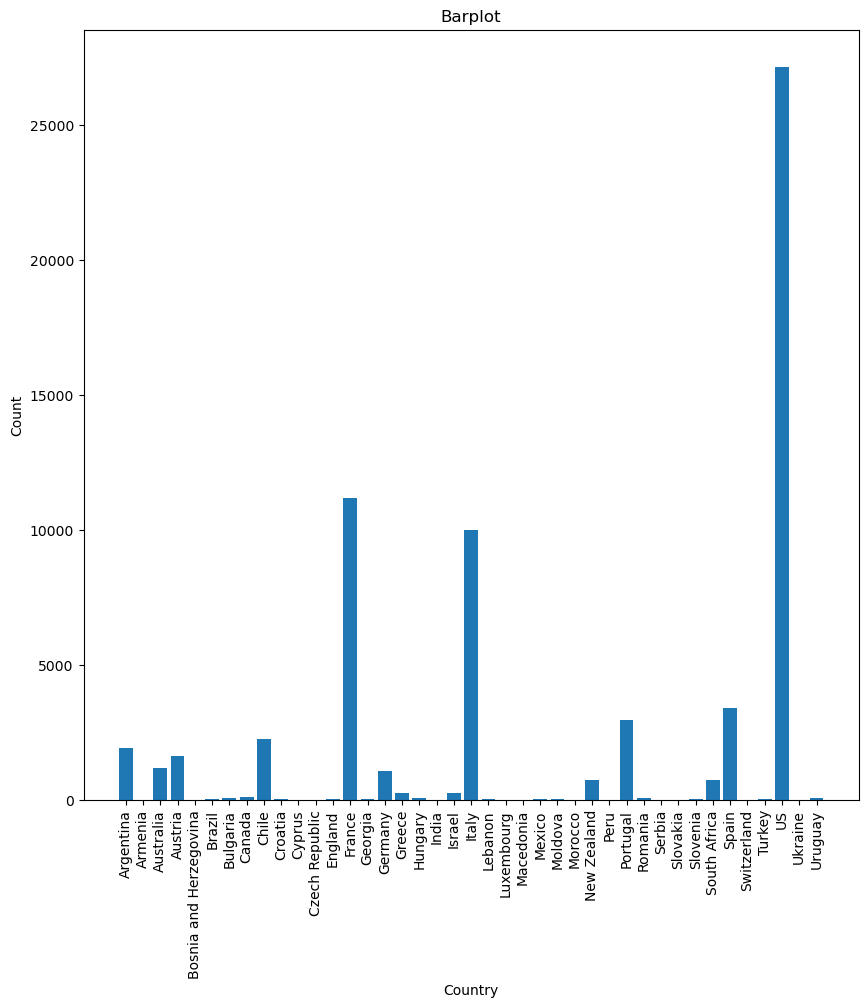

In [6]:
#б
countries, counts = np.unique(data['country'].dropna().to_numpy(), return_counts=True)
plt.figure(figsize=(10, 10))
plt.bar(countries, counts)
plt.xticks(rotation=90)
plt.title('Barplot')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Задание 2

Постройте поверхность $f(x,y)=\ln ({{x}^{2}}+{{y}^{2}}-xy)$ на $x,y\in [1,2]$

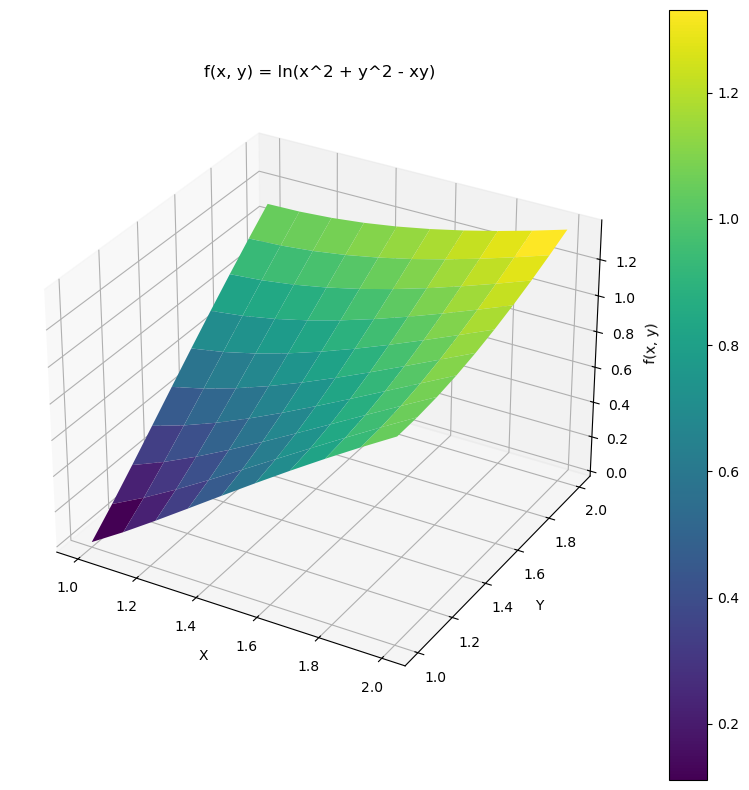

In [7]:
def f(x, y):
    return np.log(x**2 + y**2 - x*y)

x = np.linspace(1, 2, 10)
y = np.linspace(1, 2, 10)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

fig.colorbar(surface)
ax.set_title('f(x, y) = ln(x^2 + y^2 - xy)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
plt.show()

## Задание 3

Считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions считайте только первые 1000000 строк. Соедините transactions со всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner. После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). 

In [8]:
from datetime import datetime

tr_mcc_codes = pd.read_csv(filepath_or_buffer = "../Mavlyukaev_AI/data/tr_mcc_codes.csv", 
                           sep=';')
tr_types = pd.read_csv(filepath_or_buffer = "../Mavlyukaev_AI/data/tr_types.csv", 
                       sep=';')
transactions = pd.read_csv(filepath_or_buffer = "../Mavlyukaev_AI/data/transactions.csv", 
                           sep=',', 
                           nrows=1000000)
gender_train = pd.read_csv(filepath_or_buffer = "../Mavlyukaev_AI/data/gender_train.csv", 
                           sep=',')

transactions = transactions.merge(tr_mcc_codes, on='mcc_code')
transactions = transactions.merge(tr_types, on='tr_type')
transactions = transactions.merge(gender_train, on='customer_id', how='left')

print(f"Количество строк после объединения: {len(transactions)}")

transactions['tr_day'] = transactions['tr_datetime'].str.split(' ').str[0]
print(transactions[['tr_datetime', 'tr_day']].head())

Количество строк после объединения: 999584
  tr_datetime tr_day
0  0 10:23:26      0
1  1 10:19:29      1
2  1 10:20:56      1
3  1 10:39:54      1
4  2 15:33:42      2


## Задание 4

1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в созданную функцию plot_pivot_table.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
     1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
     2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
     3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
     4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
     5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

     amount amount_bucket
0  -2245.92      Very Low
1  56147.89        Income
2 -56147.89     Very High
3  -1392.47      Very Low
4   -920.83      Very Low
  tr_datetime  tr_hour
0  0 10:23:26       10
1  1 10:19:29       10
2  1 10:20:56       10
3  1 10:39:54       10
4  2 15:33:42       15


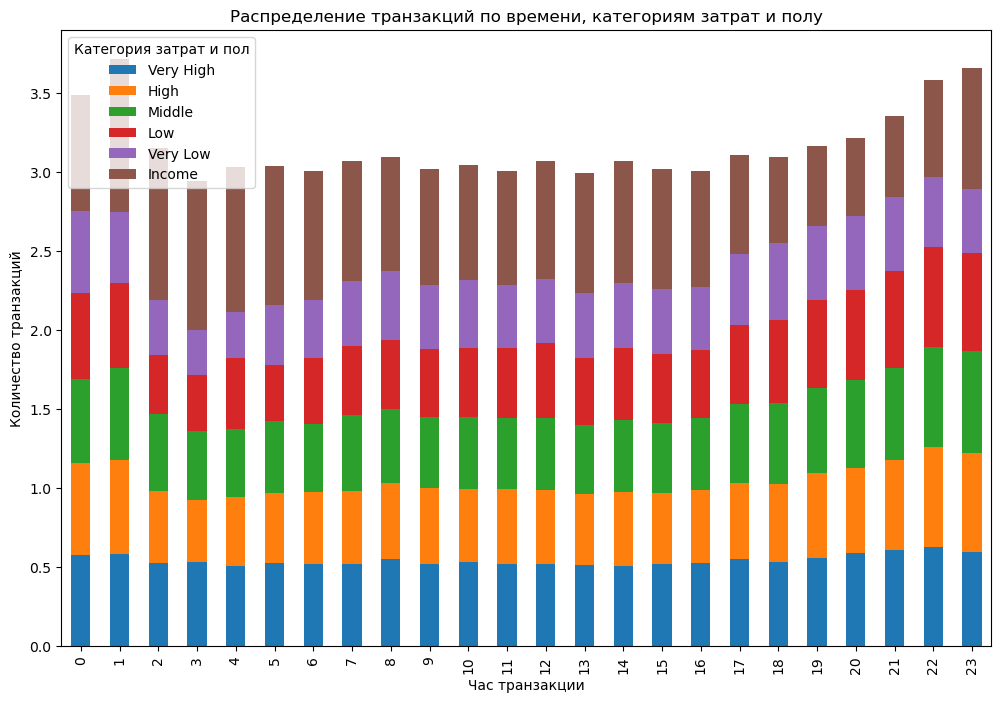

<Axes: xlabel='amount_bucket', ylabel='tr_hour'>

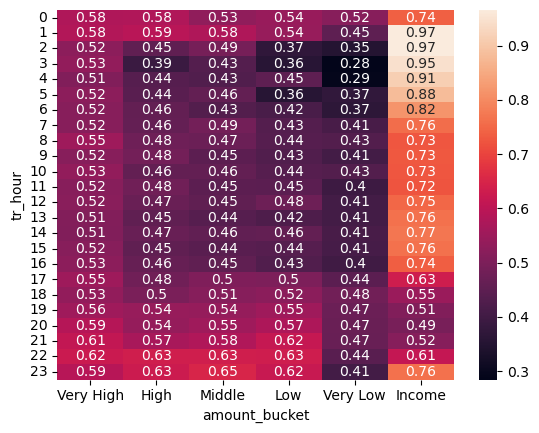

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#1
transactions['amount_bucket'] = pd.qcut(transactions[transactions['amount'] < 0]['amount'], 
                                         q=5, 
                                         labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

# 2
transactions['amount_bucket'] = transactions['amount_bucket'].cat.add_categories('Income')
transactions.loc[transactions['amount'] >= 0, 'amount_bucket'] = 'Income'
print(transactions[['amount', 'amount_bucket']].head())

# 3
transactions['tr_hour'] = transactions['tr_datetime'].str.split(' ').apply(lambda x: int(x[1].split(':')[0]))
print(transactions[['tr_datetime', 'tr_hour']].head())

# 4. Создание сводной таблицы
pivot_table = transactions.pivot_table(index='tr_hour', 
                                       columns='amount_bucket', 
                                       values='gender', 
                                       observed=False,
                                       fill_value=0)

# 5. Функция для отрисовки сводной таблицы
def plot_pivot_table(pivot_table):
    pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Распределение транзакций по времени, категориям затрат и полу')
    plt.xlabel('Час транзакции')
    plt.ylabel('Количество транзакций')
    plt.legend(title='Категория затрат и пол')
    plt.show()

# Вызов функции для отрисовки
plot_pivot_table(pivot_table)

sns.heatmap(pivot_table, annot=True)

In [ ]:
 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими. +
 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами. +
 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. +

In [ ]:
Ответы: 1, 3, 5

## Задание 5

1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
     1) 2 из полученных MCC-кодов связаны с финансовыми институтами
     2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
     3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
     4) Денежные переводы имеют как минимум 3 явных минимума средних
     5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

<Figure size 1200x1200 with 0 Axes>

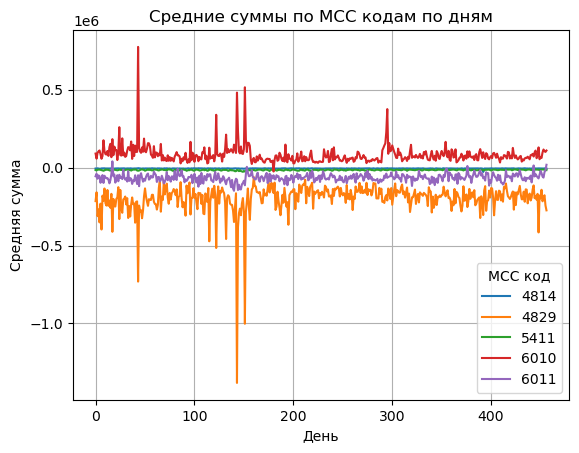

In [13]:
#1
transactions['tr_day'] = transactions['tr_day'].astype(int)

#2
mcc_counts = transactions['mcc_code'].value_counts()
frequent_mcc_codes = mcc_counts[mcc_counts > 60000].index

#3
filtered_transactions = transactions[transactions['mcc_code'].isin(frequent_mcc_codes)]
grouped_means = filtered_transactions.groupby(['tr_day', 'mcc_code'])['amount'].mean().reset_index()

#4
pivot_table = grouped_means.pivot(index='tr_day', columns='mcc_code', values='amount')

plt.figure(figsize=(12, 12))
pivot_table.plot()
plt.title('Средние суммы по MCC кодам по дням')
plt.xlabel('День')
plt.ylabel('Средняя сумма')
plt.legend(title='MCC код')
plt.grid()
plt.show()

In [ ]:
#6
#4814 - Звонки с использованием телефонов, считывающих магнитную ленту
#4829 - денежные переводы
#5411 - Бакалейные магазины, супермаркеты
#6010 - фин институт - снятие наличных вручную
#6011 - фин институт - снятие наличных автоматически

#1 да 
#2 да
#3 нет
#4 да 
#5 нет